### Particle Filters 
Implementation of particle filters for localisation problems in 2D.

In [1]:
import sys
sys.path.insert(0, '../topic modelling')

In [2]:
from helper_spatial import extract_track_from_kml, WGS84toOSGB36
from helper_particles import *

* Import data from KML file

In [3]:
datetimes, lats, lons, speeds, bearings = extract_track_from_kml('../map matching/data/Patrol/doc.kml')
speed_unit = 'km_per_hour'

# Extract only the bit that you are interested in
datetimes = datetimes[90:120]
lats = lats[90:120]
lons = lons[90:120]
speeds = speeds[90:120]
bearings = bearings[90:120]

* Date Preprocessing

In [4]:
# Convert lat/lon to easting/northing
Es = []
Ns = []
for i in range(0,len(lats)):
    E,N = WGS84toOSGB36(lats[i], lons[i])
    Es.append(E)
    Ns.append(N)

In [5]:
# Convert readings to GPS point class objects
GPS_points = []
for idx in range(0,len(Es)):
    GPS_points.append(Point(Es[idx],Ns[idx],speeds[idx],bearings[idx],datetimes[idx]))

* Plot Journey

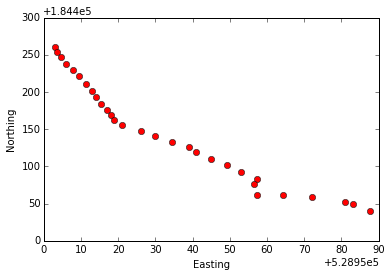

In [6]:
%matplotlib inline
for point in GPS_points:
    plt.plot(point.e, point.n, 'ro')
plt.xlabel('Easting')
plt.ylabel('Northing')

* Pick one point for initial analysis

In [7]:
GPS_first = GPS_points[0]

* Initialise particles

In [8]:
S_first = initialize_particles(100,GPS_first)